In [21]:
# Using Keras to create a 10 neurons and single layer NN
# Against the MNIST databesa

from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

In [22]:
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
nb_classes = 10

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


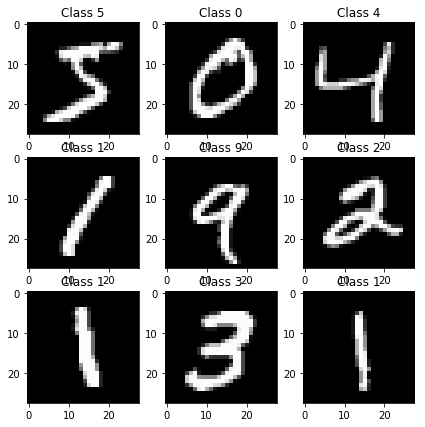

In [23]:
# Show some images
def show(X_train, y_train):
	for i in range(9):
	    plt.subplot(3,3,i+1)
	    plt.imshow(X_train[i], cmap='gray', interpolation='none')
	    plt.title("Class {}".format(y_train[i]))
	plt.show()

show(X_train, y_train)

In [24]:
# Reshape arrays
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [27]:
model = Sequential()
model.add(Dense(10, input_shape = (784,)))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [33]:
# Compile model
sgd = SGD(lr=0.05)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [34]:
# Fit the model
model.fit(X_train, Y_train, epochs=2, batch_size=100,  verbose=1)

Epoch 1/2
60000/60000 [==============================] - 0s - loss: 0.2819 - acc: 0.9214     
Epoch 2/2
60000/60000 [==============================] - 0s - loss: 0.2736 - acc: 0.9234     
